이것은 [Deep Learning with Python, Second Edition](https://www.manning.com/books/deep-learning-with-python-second-edition?a_aid=keras&a_bid=76564dff) 책의 노트북이다. 가독성을 위해 실행 가능한 코드 블록과 섹션 제목만 포함하고 책의 다른 모든 텍스트 단락, 그림 및 의사 코드는 생략한다.

**무슨 일이 일어나고 있는지 확인하고 싶다면 책과 함께 노트북을 사용하는 것을 권장한다.**

이 노트북은 TensorFlow 2.6 기반이다. (옮긴이: 버전 2.10.0, 애플 실리콘 M1 으로 테스트)

# 0 기본 정보

In [1]:
import platform
import sys

import numpy as np
import scipy as sp

import pandas as pd
import sklearn as sk

In [2]:
print(f"Platform: {platform.platform()}")
print(f"Python: {sys.version}")
print()
print(f"Numpy: {np.__version__}")
print(f"Scipy: {sp.__version__}")
print()
print(f"Pandas: {pd.__version__}")
print(f"Sickit-Learn: {sk.__version__}")

Platform: macOS-13.0.1-arm64-arm-64bit
Python: 3.9.13 (main, Oct 13 2022, 16:12:19) 
[Clang 12.0.0 ]

Numpy: 1.23.4
Scipy: 1.9.3

Pandas: 1.4.4
Sickit-Learn: 1.1.3


In [3]:
import tensorflow as tf
from tensorflow import keras

In [4]:
print(f"TensorFlow: {tf.__version__}")
print(f"Keras: {keras.__version__}")

TensorFlow: 2.10.0
Keras: 2.10.0


In [5]:
tf.config.list_physical_devices('CPU')

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [6]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [7]:
gpu = len(tf.config.list_physical_devices('GPU')) > 0
print("GPU is","avaialble" if gpu else "NOT available")

GPU is avaialble


# 2 신경망의 수학적 구축 요소

## 2.1 신경망의 첫 인상

**케라스의 MNIST 데이터셋 적재** ( [tf.keras.datasets.mnist](https://www.tensorflow.org/api_docs/python/tf/keras/datasets/mnist) )

In [51]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [52]:
assert train_images.shape == (60000, 28, 28) # 픽셀 값은 0 ~ 255
assert test_images.shape == (10000, 28, 28)
assert train_labels.shape == (60000,)
assert test_labels.shape == (10000,)

**이미지 데이터 준비**

In [62]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype("float32") / 255

In [63]:
import pandas as pd
pd.DataFrame(train_images).head()

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [64]:
pd.Series(train_labels).head()

0    5
1    0
2    4
3    1
4    9
dtype: uint8

**네트워크 아카텍처**

In [69]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(512, activation="relu"), # ReLU(Rectified Linear Unit)는 입력값이 0보다 작으면 0으로 출력, 0보다 크면 입력값 그대로 출력
    layers.Dense(10, activation="softmax") # Softmax는 확률분포를 얻기 위한 마지막 활성함수로 사용
])

**컴파일 단계**

In [71]:
model.compile(optimizer="rmsprop", # RMSprop(Root Mean Sqaure Propagation) 알고리즘
              loss="sparse_categorical_crossentropy", # 희소_범주_교차엔트로피
              metrics=["accuracy"])

**모델 "적응"**

In [68]:
model.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5


2022-11-19 18:26:30.992608: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


  1/469 [..............................] - ETA: 3:45 - loss: 2.4107 - accuracy: 0.1094

2022-11-19 18:26:31.339417: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


469/469 [==============================] - 3s 6ms/step - loss: 0.2589 - accuracy: 0.9254
Epoch 2/5
469/469 [==============================] - 3s 6ms/step - loss: 0.1037 - accuracy: 0.9690
Epoch 3/5
469/469 [==============================] - 3s 6ms/step - loss: 0.0676 - accuracy: 0.9795
Epoch 4/5
469/469 [==============================] - 3s 6ms/step - loss: 0.0486 - accuracy: 0.9851
Epoch 5/5
469/469 [==============================] - 3s 6ms/step - loss: 0.0364 - accuracy: 0.9888


**예측에 모델 사용**

In [72]:
test_digits = test_images[0:10]
predictions = model.predict(test_digits)
predictions[0]

1/1 [==============================] - 0s 185ms/step


2022-11-19 18:35:27.481104: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


array([0.08144581, 0.18989778, 0.09121139, 0.08286458, 0.10160529,
       0.11070371, 0.06203933, 0.064681  , 0.06338976, 0.1521614 ],
      dtype=float32)

In [73]:
predictions[0].argmax()

1

In [74]:
predictions[0][7]

0.064681

In [75]:
test_labels[0]

7

**새로운 데이터로 모델 평가**

In [126]:
# 테스트 모드에서 테스트 모델에 대한 손실 값과 매트릭스를 반환, 여기서는 모델에 정확도를 매트릭스 요소로 설정
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"테스트 정확도: {test_acc}")

313/313 [==============================] - 1s 4ms/step - loss: 0.0712 - accuracy: 0.9785
테스트 정확도: 0.9785000681877136


## 2.2 신경망의 데이터 표현

### 2.2.1 스칼라 (순위-0 텐서)

In [77]:
import numpy as np
x = np.array(12)
x

array(12)

In [78]:
x.ndim # number of dimension

0

### 2.2.2 벡터 (순위-1 텐서)

In [79]:
x = np.array([12, 3, 6, 14, 7])
x

array([12,  3,  6, 14,  7])

In [80]:
x.ndim

1

### 2.2.3 행렬 (순위-2 텐서)

In [81]:
x = np.array([[5, 78, 2, 34, 0],
              [6, 79, 3, 35, 1],
              [7, 80, 4, 36, 2]])
x.ndim

2

### 2.2.4 순위-3 및 다차-순위 텐서

In [82]:
x = np.array([[[5, 78, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]],
              [[5, 78, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]],
              [[5, 78, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]]])
x.ndim

3

### 2.2.5 주요 속성

In [83]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [84]:
train_images.ndim

3

In [85]:
train_images.shape

(60000, 28, 28)

In [86]:
train_images.dtype # data type

dtype('uint8')

**다섯 번째 디지털 정보 이미지 표시**

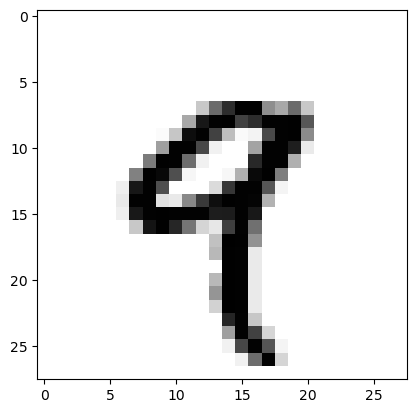

In [87]:
import matplotlib.pyplot as plt
digit = train_images[4]
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

In [88]:
train_labels[4]

9

### 2.2.6 넘파이로 텐서 조작하기

In [89]:
my_slice = train_images[10:100]
my_slice.shape

(90, 28, 28)

In [90]:
my_slice = train_images[10:100, :, :]
my_slice.shape

(90, 28, 28)

In [91]:
my_slice = train_images[10:100, 0:28, 0:28]
my_slice.shape

(90, 28, 28)

In [92]:
my_slice = train_images[:, 14:, 14:]
my_slice.shape

(60000, 14, 14)

In [93]:
my_slice = train_images[:, 7:-7, 7:-7]
my_slice.shape

(60000, 14, 14)

### 2.2.7 데이터 배치의 개념

In [94]:
batch = train_images[:128]
batch.shape

(128, 28, 28)

In [95]:
batch = train_images[128:256]
batch.shape

(128, 28, 28)

In [96]:
n = 3
batch = train_images[128 * n:128 * (n + 1)]
batch.shape

(128, 28, 28)

### 2.2.8 데이터 텐서의 실제 사례

### 2.2.9 벡터 데이터

### 2.2.10 시계열 데이터 또는 시퀀스 데이터

### 2.2.11 이미지 데이터

### 2.2.12 비디오 데이터

## 2.3 신경망의 톱니바퀴: 텐서 연산

### 2.3.1 요소별 연산

In [97]:
def naive_relu(x):
    assert len(x.shape) == 2
    x = x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] = max(x[i, j], 0)
    return x

In [98]:
def naive_add(x, y):
    assert len(x.shape) == 2
    assert x.shape == y.shape
    x = x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] += y[i, j]
    return x

In [99]:
import time

x = np.random.random((20, 100))
y = np.random.random((20, 100))

t0 = time.time()
for _ in range(1000):
    z = x + y
    z = np.maximum(z, 0.)
print("Took: {0:.2f} s".format(time.time() - t0))

Took: 0.01 s


In [100]:
t0 = time.time()
for _ in range(1000):
    z = naive_add(x, y)
    z = naive_relu(z)
print("Took: {0:.2f} s".format(time.time() - t0))

TypeError: 'numpy.uint8' object is not callable

### 2.3.2 브로드캐스팅

In [101]:
import numpy as np
X = np.random.random((32, 10))
y = np.random.random((10,))

In [102]:
y = np.expand_dims(y, axis=0) # 확장될 배열 형태의 축 위치에 나타날 새 축을 삽입

In [103]:
Y = np.concatenate([y] * 32, axis=0) # 존재하는 축에 따라 배열 시퀀스를 결합

In [104]:
def naive_add_matrix_and_vector(x, y):
    assert len(x.shape) == 2
    assert len(y.shape) == 1
    assert x.shape[1] == y.shape[0]
    x = x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] += y[j]
    return x

In [105]:
import numpy as np
x = np.random.random((64, 3, 32, 10))
y = np.random.random((32, 10))
z = np.maximum(x, y)

### 2.3.3 텐서 곱

In [106]:
x = np.random.random((32,))
y = np.random.random((32,))
z = np.dot(x, y)

In [107]:
def naive_vector_dot(x, y):
    assert len(x.shape) == 1
    assert len(y.shape) == 1
    assert x.shape[0] == y.shape[0]
    z = 0.
    for i in range(x.shape[0]):
        z += x[i] * y[i]
    return z

In [108]:
def naive_matrix_vector_dot(x, y):
    assert len(x.shape) == 2
    assert len(y.shape) == 1
    assert x.shape[1] == y.shape[0]
    z = np.zeros(x.shape[0])
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            z[i] += x[i, j] * y[j]
    return z

In [109]:
def naive_matrix_vector_dot(x, y):
    z = np.zeros(x.shape[0])
    for i in range(x.shape[0]):
        z[i] = naive_vector_dot(x[i, :], y)
    return z

In [110]:
def naive_matrix_dot(x, y):
    assert len(x.shape) == 2
    assert len(y.shape) == 2
    assert x.shape[1] == y.shape[0]
    z = np.zeros((x.shape[0], y.shape[1]))
    for i in range(x.shape[0]):
        for j in range(y.shape[1]):
            row_x = x[i, :]
            column_y = y[:, j]
            z[i, j] = naive_vector_dot(row_x, column_y)
    return z

### 2.3.4 텐서 형태 변경

In [111]:
train_images = train_images.reshape((60000, 28 * 28))

In [112]:
x = np.array([[0., 1.],
             [2., 3.],
             [4., 5.]])
x.shape

(3, 2)

In [113]:
x = x.reshape((6, 1))
x

array([[0.],
       [1.],
       [2.],
       [3.],
       [4.],
       [5.]])

In [115]:
x = np.zeros((300, 20))
x = np.transpose(x) # 행렬 전치
x.shape

(20, 300)

### 2.3.5 텐서 연산의 기하학적 해석

### 2.3.6 딥러닝의 기하학적 해석

## 2.4 신경만 엔진:  경사-기반 최적화

### 2.4.1 도함수란?

### 2.4.2 텐서 연산 도함수: 경사

### 2.4.3 확률적 경사하강법

### 2.4.4 도함수 연쇄: 역전파 알고리즘

#### 연쇄 규칙

#### 계산 그래프로 자동 미분

#### 텐서플로의 경사 테이프

In [116]:
import tensorflow as tf

In [117]:
x = tf.Variable(0.)
with tf.GradientTape() as tape:
    y = 2 * x + 3
grad_of_y_wrt_x = tape.gradient(y, x)

In [118]:
x = tf.Variable(tf.random.uniform((2, 2)))
with tf.GradientTape() as tape:
    y = 2 * x + 3
grad_of_y_wrt_x = tape.gradient(y, x)

In [119]:
W = tf.Variable(tf.random.uniform((2, 2)))
b = tf.Variable(tf.zeros((2,)))
x = tf.random.uniform((2, 2))
with tf.GradientTape() as tape:
    y = tf.matmul(x, W) + b
grad_of_y_wrt_W_and_b = tape.gradient(y, [W, b])

## 2.5 첫 번째 예제 다시 돌아보기

In [121]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype("float32") / 255

In [127]:
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])

SyntaxError: invalid syntax (4141210288.py, line 2)

In [123]:
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

In [124]:
model.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
  8/469 [..............................] - ETA: 3s - loss: 1.4154 - accuracy: 0.5850  

2022-11-19 18:38:30.241571: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


469/469 [==============================] - 3s 6ms/step - loss: 0.2601 - accuracy: 0.9254
Epoch 2/5
469/469 [==============================] - 3s 6ms/step - loss: 0.1059 - accuracy: 0.9690
Epoch 3/5
469/469 [==============================] - 3s 6ms/step - loss: 0.0694 - accuracy: 0.9794
Epoch 4/5
469/469 [==============================] - 3s 6ms/step - loss: 0.0508 - accuracy: 0.9852
Epoch 5/5
469/469 [==============================] - 3s 6ms/step - loss: 0.0379 - accuracy: 0.9885


### 텐서플로 첫 번째 예제를 처음부터 다시 구현

#### 단순 밀집 클래스

In [132]:
layers.Dense?? # 밀집 클래스 보기

In [133]:
import tensorflow as tf

class NaiveDense:
    def __init__(self, input_size, output_size, activation):
        self.activation = activation

        w_shape = (input_size, output_size)
        w_initial_value = tf.random.uniform(w_shape, minval=0, maxval=1e-1)
        self.W = tf.Variable(w_initial_value) # Weight: 가중치

        b_shape = (output_size,)
        b_initial_value = tf.zeros(b_shape)
        self.b = tf.Variable(b_initial_value) # bias: 편향

    def __call__(self, inputs):
        return self.activation(tf.matmul(inputs, self.W) + self.b)

    @property
    def weights(self):
        return [self.W, self.b]

#### 단순 순차 클래스

In [134]:
keras.Sequential?? # 순차 클래스 소스

In [135]:
class NaiveSequential:
    def __init__(self, layers):
        self.layers = layers

    def __call__(self, inputs):
        x = inputs
        for layer in self.layers:
           x = layer(x)
        return x

    @property
    def weights(self):
       weights = []
       for layer in self.layers:
           weights += layer.weights
       return weights

In [136]:
model = NaiveSequential([
    NaiveDense(input_size=28 * 28, output_size=512, activation=tf.nn.relu),
    NaiveDense(input_size=512, output_size=10, activation=tf.nn.softmax)
])
assert len(model.weights) == 4

#### 배치 생성기

In [137]:
import math

class BatchGenerator:
    def __init__(self, images, labels, batch_size=128):
        assert len(images) == len(labels)
        self.index = 0
        self.images = images
        self.labels = labels
        self.batch_size = batch_size
        self.num_batches = math.ceil(len(images) / batch_size)

    def next(self):
        images = self.images[self.index : self.index + self.batch_size]
        labels = self.labels[self.index : self.index + self.batch_size]
        self.index += self.batch_size
        return images, labels

### 2.5.2 훈련 단계 수행

In [138]:
def one_training_step(model, images_batch, labels_batch):
    with tf.GradientTape() as tape:
        predictions = model(images_batch)
        per_sample_losses = tf.keras.losses.sparse_categorical_crossentropy(
            labels_batch, predictions)
        average_loss = tf.reduce_mean(per_sample_losses)
    gradients = tape.gradient(average_loss, model.weights)
    update_weights(gradients, model.weights)
    return average_loss

In [139]:
learning_rate = 1e-3

def update_weights(gradients, weights):
    for g, w in zip(gradients, weights):
        w.assign_sub(g * learning_rate)

In [140]:
from tensorflow.keras import optimizers

optimizer = optimizers.SGD(learning_rate=1e-3)

def update_weights(gradients, weights):
    optimizer.apply_gradients(zip(gradients, weights))

### 2.5.3 전체 훈련 루프

In [141]:
def fit(model, images, labels, epochs, batch_size=128):
    for epoch_counter in range(epochs):
        print(f"Epoch {epoch_counter}")
        batch_generator = BatchGenerator(images, labels)
        for batch_counter in range(batch_generator.num_batches):
            images_batch, labels_batch = batch_generator.next()
            loss = one_training_step(model, images_batch, labels_batch)
            if batch_counter % 100 == 0:
                print(f"loss at batch {batch_counter}: {loss:.2f}")

In [142]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype("float32") / 255

fit(model, train_images, train_labels, epochs=10, batch_size=128)

Epoch 0
loss at batch 0: 6.24
loss at batch 100: 2.26
loss at batch 200: 2.22
loss at batch 300: 2.09
loss at batch 400: 2.26
Epoch 1
loss at batch 0: 1.92
loss at batch 100: 1.90
loss at batch 200: 1.84
loss at batch 300: 1.72
loss at batch 400: 1.87
Epoch 2
loss at batch 0: 1.59
loss at batch 100: 1.60
loss at batch 200: 1.51
loss at batch 300: 1.43
loss at batch 400: 1.54
Epoch 3
loss at batch 0: 1.33
loss at batch 100: 1.36
loss at batch 200: 1.25
loss at batch 300: 1.21
loss at batch 400: 1.30
Epoch 4
loss at batch 0: 1.13
loss at batch 100: 1.18
loss at batch 200: 1.05
loss at batch 300: 1.05
loss at batch 400: 1.13
Epoch 5
loss at batch 0: 0.99
loss at batch 100: 1.03
loss at batch 200: 0.91
loss at batch 300: 0.93
loss at batch 400: 1.00
Epoch 6
loss at batch 0: 0.88
loss at batch 100: 0.93
loss at batch 200: 0.80
loss at batch 300: 0.84
loss at batch 400: 0.91
Epoch 7
loss at batch 0: 0.79
loss at batch 100: 0.84
loss at batch 200: 0.72
loss at batch 300: 0.77
loss at batch 40

### 2.5.4 모델 평가

In [143]:
predictions = model(test_images)
predictions = predictions.numpy()
predicted_labels = np.argmax(predictions, axis=1)
matches = predicted_labels == test_labels
print(f"accuracy: {matches.mean():.2f}")

accuracy: 0.81


## 2.6 요약